<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week5/WOA7015_Wk5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 5
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


## Now we do a simple SVM model training. 

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions
import pandas as pd

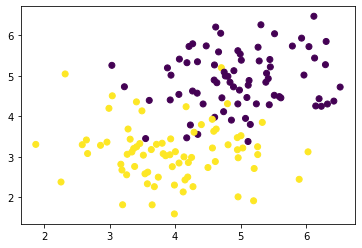

In [17]:
# Generate data

# Configuration options
num_samples_total = 150
cluster_centers = [(5,5), (4,3)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, cluster_std = 0.80)
plt.scatter(X[:, 0], X[:, 1], c=y)


In [ ]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X, y)


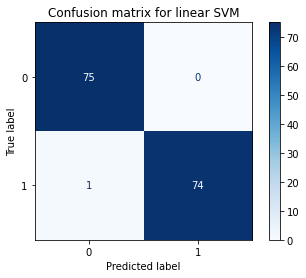

In [ ]:
# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svm, X, y,
                                 cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [ ]:
# Generate predictions
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.9933333333333333


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


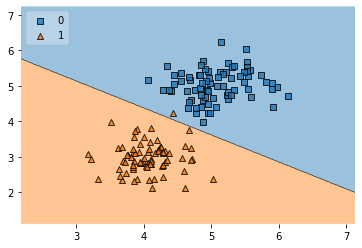

In [ ]:
# Plot decision boundary
plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()

### How do we know if the model is good to predict future data? 
We split the data into training and testing data. 

Testing data serves as a future data. 

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/train_test.png" width="300"/>

In [69]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  120
no of testing data:  30


In [ ]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy}')
print(f'Model testing accuracy: {test_accuracy}')

Model training accuracy: 1.0
Model testing accuracy: 0.9916666666666667


# To check if the model is really robust. 
# We can do cross validation.

Cross validation is we seperate data into k-fold. Here, we demostrate 5-fold. <br> 

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV.png" width="512"/>

<br>

**At first iteration**, 
*   Use the first four set of data for training (blue boxes) and last set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_1*. <br>

**At second iteration**, 
*   Use the first 1, 2, 3, 5 set of data for training (blue boxes) and 4th set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_2*. <br>

**At third iteration**, 
*   Use the first 1, 2, 4, 5 set of data for training (blue boxes) and 3rd set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_3*. <br>

**Repeat till 5th iteration, we will have 5 validation accuracy. <br>
Average accuracy can be computed to evaluate the model performance.**









In [ ]:
from sklearn.model_selection import KFold
# refer to https://scikit-learn.org/stable/modules/cross_validation.html 

kf = KFold(n_splits=5)
n=1
train_acc, val_acc = [], []

for train_index, test_index in kf.split(X):
  X_train, X_val = X[train_index], X[test_index]
  y_train, y_val = y[train_index], y[test_index]

  print('Fold ', n)
  print('no of training data: ', len(X_train))
  print('no of validation data: ', len(X_val))

  # Create the SVM with linear kernel
  svm = SVC(random_state=42, kernel='linear')

  # Fit the data to the SVM classifier
  svm = svm.fit(X_train, y_train)

  # Generate predictions
  y_pred_train = svm.predict(X_train)
  y_pred_val = svm.predict(X_val)

  # Evaluate by means of accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  val_accuracy = accuracy_score(y_val, y_pred_test)
  print(f'Model training accuracy: {train_accuracy}')
  print(f'Model testing accuracy: {val_accuracy}')

  n += 1
  train_acc.append(train_accuracy)
  val_acc.append(val_accuracy)
  print('------------------------------------')

print(f'Average Validation Accuracy: {np.average(train_acc):.4f} +- {np.std(val_acc):.4f}')


## Hyperparameter Tuning

We know that there are parameters that can be tuned. To determine the best hyperparameter, we use grid_search which uses cross validation concept to determine the best hyperparameter. 


<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV_test.png" width="512"/>

<br>

**Split the data into Train, Validation and Test**

**At first iteration**, 
*   Use the first four set of data for training (blue boxes) and last set of data (white box) as validation.
*    We train the model using training data ***using different combination of hyperparameters*** and test on the validation data. 
*    Says we tried 5 hyperparameter combinations, we will have 5 models and 5 validation accuracies. 
*    The model that give the highest validation accuracy will be chosen. 
*    We will get *validation accuracy_1* and a set of *hyperparameter_1*. <br>

**At second iteration**, 
*   Use the first 1, 2, 3, 5 set of data for training (blue boxes) and 4th set of data (white box) as validation.
*    We train the model using training data ***using different combination of hyperparameters*** and test on the validation data. 
*    Says we tried 5 hyperparameter combinations, we will have 5 models and 5 validation accuracies. 
*    We will get *validation accuracy_2* and a set of *hyperparameter_2*. <br>


**Repeat till 5th iteration, we will have 5 validation accuracies. <br>
The set of hyperparameters that gives the highest validation accuracy will be chosen.  <br>
Retrain your model with all of the training + validation data using the best hyperparameter. <br>
Evaluate your final model on test set** 


### We can use GridSearchCV in which it does the procedure we described. 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

# use iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))


In [24]:
svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
results = clf.cv_results_
results = pd.DataFrame.from_dict(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000885,0.000422,0.000453,0.000121,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0,1.0,1.0,1.000000,0.833333,0.966667,0.066667,3
1,0.000420,0.000014,0.000277,0.000013,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.0,1.0,1.0,0.833333,0.833333,0.933333,0.081650,4
2,0.000414,0.000016,0.000250,0.000002,10,linear,"{'C': 10, 'kernel': 'linear'}",1.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000,1
3,0.000400,0.000010,0.000264,0.000012,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000,1


In [30]:
# Retrain the model with the best hyperparameter 
best_param = clf.best_params_
print('best param: ', best_param)
svc.set_params(**best_param)
svc.fit(X_train, y_train)

best param:  {'C': 10, 'kernel': 'linear'}


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
# Evaluate model performance using test data

# Generate predictions
y_pred = svc.predict(X_test)

# Evaluate by means of accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Model CV accuracy: ', results['mean_test_score'].iloc[2])
print('Model testing accuracy: ', test_accuracy)
print('Parameter used:', best_param)

Model CV accuracy:  1.0
Model testing accuracy:  0.975
Parameter used: {'C': 10, 'kernel': 'linear'}


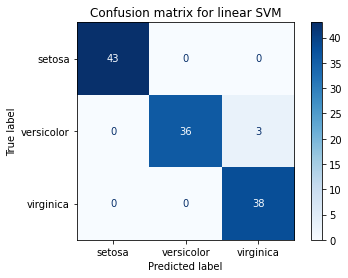

In [68]:
# Evaluate by means of a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svc, X_test, y_test,
                              cmap=plt.cm.Blues, 
                               display_labels=iris.target_names)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [66]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        43
  versicolor       1.00      0.92      0.96        39
   virginica       0.93      1.00      0.96        38

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## Your task (10%): Train a SVM model to best classify breast cancer data.

Steps:
1. Load data 
2. 2% - split data into 80% train, 20% test 
3. 2% - train your svm model using only the train data. 
4. 4% - Try at least 10 different hyperparameter, obtain the validation accuracies. 
5. 2% - What is the hyperparameters of the final model? What is the CV accuracy and testing accuracy. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# Load the breast cancer dataset
bc = datasets.load_breast_cancer()
df = pd.DataFrame(data=bc.data)
df["label"] = bc.target

In [ ]:
# Scatter plot shown in fig 1
plt.scatter(df[0][df["label"] == 0], df[1][df["label"] == 0], 
            color='red', marker='o', label='malignant')
plt.scatter(df[0][df["label"] == 1], df[1][df["label"] == 1], 
            color='green', marker='*', label='benign')
plt.xlabel('Malignant')
plt.ylabel('Benign')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# your code here #